# **BREAST CANCER**

# **Import Library**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **BUSINESS UNDERSTANDING**

## **Business Objective**

Sebuah rumah sakit ingin meneliti faktor utama yang memengaruhi harapan hidup pasien penderita kanker payudara. Rumah sakit tersebut memiliki data pasien yang mencakup stadium kanker berdasarkan sistem **American Joint Committee on Cancer (AJCC) edisi ke-6**, ukuran tumor, jumlah kelenjar getah bening yang positif, status hormon (Estrogen dan Progesteron), serta lama bertahan hidup pasien dalam bulan.

Data yang digunakan berasal dari program **SEER** milik **National Cancer Institute**, yang mencatat data 4024 pasien perempuan dengan diagnosis kanker payudara pada tahun 2006–2010.

Rumah sakit ingin mengetahui apakah tingkat keparahan kanker, ukuran tumor, serta penyebaran ke kelenjar getah bening benar-benar berpengaruh terhadap harapan hidup pasien. Analisis dilakukan dengan memanfaatkan variabel seperti **stadium kanker** (T Stage, N Stage, 6th Stage), **ukuran tumor**, **jumlah kelenjar getah bening positif** (Regional Node Positive), dan  **status hormon** (Estrogen dan Progesteron).

Tujuan dari analisis ini adalah:
- Mengidentifikasi faktor-faktor yang paling memengaruhi kelangsungan hidup pasien kanker payudara
- Memahami hubungan antara karakteristik kanker dengan tingkat harapan hidup pasien
- Memberikan informasi pendukung bagi tenaga medis dalam mengevaluasi tingkat risiko pasien dan membantu proses pengambilan keputusan klinis

## **Asses Situation**

Dataset pasien kanker payudara ini diperoleh dari pembaruan November 2017 Program SEER milik NCI (*National Cancer Institute*), yang menyediakan informasi tentang statistik kanker berbasis populasi di Amerika Serikat. Dataset ini melibatkan pasien wanita dengan kanker payudara **karsinoma duktus** (*Infiltrating duct*) dan **lobular infiltratif** (*Lobular carcinoma*) yang didiagnosis pada tahun 2006-2010. Pasien dengan ukuran tumor yang tidak diketahui, kelenjar getah bening regional yang diperiksa, kelenjar getah bening regional positif, dan pasien yang masa hidupnya kurang dari 1 bulan dikecualikan; dengan demikian, 4024 pasien akhirnya dimasukkan.

## **Analytic Goals**

Berdasarkan permasalahan di atas, tujuan dari dilakukannya analisis tersebut, yaitu:
* Menganalisis data untuk memahami hubungan antara karakteristik kanker yang diderita pasien dengan tingkat harapan hidup pasien
* Melihat data secara menyeluruh untuk mengetahui pola dan hubungan antar variabel
* Mengidentifikasi variabel yang paling berpengaruh terhadap tingkat harapan hidup

## **Project Plan**

Setelah menentukan tujuan analisis, rencana tahapan proyek yang akan dilakukan:

1.   Memahami Proses Bisnis
     *   Melakukan pemahaman terhadap tujuan rumah sakit, yaitu ingin mengetahui faktor apa saja yang paling memengaruhi harapan hidup pasien
     *   Menentukan fokus analisis
2.   Mengumpulkan dan Memahami Data
     *   Melakukan pemeriksaan struktur dataset, jenis data pada setiap kolom, jumlah data, serta pengecekan apakah ada data yang kosong atau tidak lengkap
3.   Menyiapkan dan Membersihkan Data
     *   Melakukan pembersihan data seperti menghapus data duplikat, menangani missing values, serta mengubah data kategori menjadi bentuk angka agar bisa digunakan dalam model klasifikasi
4.   Melakukan Eksplorasi dan Membuat Visualisasi
     *   Menganalisis data yang sudah bersih menggunakan grafik untuk melihat pola distribusi dan hubungan antar variabel
5.   Membangun dan Mengevaluasi Model Klasifikasi
     *   Membuat model pengelompokan untuk memprediksi status kelangsungan hidup pasien berdasarkan fitur klinis seperti stadium, ukuran tumor, dan status hormon.
     *   Melakukan evaluasi model untuk memastikan model tidak hanya "tebak-tebakan", tetapi benar-benar akurat dalam mengidentifikasi pasien dengan risiko kematian tinggi.
6.   Menarik Insight dan Memberikan Rekomendasi
     *   Menyimpulkan faktor risiko utama yang ditemukan dari hasil visualisasi dan model prediktif.
     *   Memberikan rekomendasi klinis kepada rumah sakit mengenai protokol pemantauan intensif bagi kelompok pasien "Triple Negative" atau pasien dengan stadium tertentu yang berdasarkan data memiliki tingkat survival yang lebih rendah.

# **DATA UNDERSTANDING**

## **Dataset**

In [3]:
path = "/content/drive/MyDrive/Dataset Praktikum AVD Octaa/Breast_Cancer.csv"

df = pd.read_csv(path)

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


## **Struktur Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### **Informasi Dasar**

Berdasarkan data di atas, diketahui bahwa dataset tersebut memiliki 4024 baris dan 16 kolom.

### **Informasi Lanjutan**

**1. Age**

Jumlah baris: 4024

Tipe data: int64

Deskripsi: Usia pasien saat didiagnosis kanker payudara

**2. Race**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Ras atau latar belakang etnis pasien

**3. Marital Status**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Status pernikahan pasien

**4. T Stage**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Stadium tumor utama berdasarkan ukuran dan penyebaran tumor (AJCC)

**5. N Stage**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Stadium penyebaran kanker ke kelenjar getah bening

**6. 6th Stage**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Stadium kanker secara keseluruhan berdasarkan sistem AJCC edisi ke-6

**7. differentiate**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Tingkat diferensiasi sel kanker

**8. Grade**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Tingkat keganasan atau agresivitas sel kanker

**9. A Stage**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Stadium kanker berdasarkan klasifikasi tambahan (Localized, Regional, Distant)

**10. Tumor Size**

Jumlah baris: 4024

Tipe data: int64

Deskripsi: Ukuran tumor dalam satuan milimeter

**11. Estrogen Status**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Status reseptor hormon estrogen (positif atau negatif)

**12. Progesterone Status**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Status reseptor hormon progesteron (positif atau negatif)

**13. Regional Node Examined**

Jumlah baris: 4024

Tipe data: int64

Deskripsi: Jumlah kelenjar getah bening yang diperiksa

**14. Reginol Node Positive**

Jumlah baris: 4024

Tipe data: int64

Deskripsi: Jumlah kelenjar getah bening yang terdeteksi mengandung sel kanker

**15. Survival Months**

Jumlah baris: 4024

Tipe data: int64

Deskripsi: Lama bertahan hidup pasien dalam hitungan bulan

**16. Status**

Jumlah baris: 4024

Tipe data: object

Deskripsi: Status akhir pasien (hidup atau meninggal)

### **Informasi Statistik Deskriptif**

In [5]:
df.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


**1. Count (Kelengkapan Data)**

Berdasarkan data, total baris yang terdapat pada dataset Breast Cancer adalah 4024. Maka dapat kita tarik kesimpulan, bahwa dataset tersebut tidak memiliki data yang kosong atau hilang.

---

**2. Mean vs Median (Distribusi Data)**
* Kolom Age
  * Mean = 53,97
  * Median = 54

Menunjukkan bahwa nilai mean dan median hampir sama, menunjukkan bahwa distribusi usia pasien relatif simetris dan tidak terdapat perbedaan yang signifikan akibat outlier.

* Kolom Tumor Size
  * Mean = 30,47
  * Median = 25

Menunjukkan bahwa nilai mean lebih besar dibandingkan median. Hal ini menunjukkan adanya beberapa pasien dengan ukuran tumor yang sangat besar sehingga menarik rata-rata ke arah kanan.

* Kolom Regional Node Examined
  * Mean = 14,36
  * Median = 14

Menunukan bahwa nilai mean dan median hampir sama, sehingga distribusi jumlah kelenjar getah bening yang diperiksa cenderung normal atau mendekati simetris.

* Kolom Reginol Node Positive
  * Mean = 4,16
  * Median = 2

Menunjukkan bahwa nilai mean jauh lebih besar dibandingkan median. Ini menunjukkan adanya beberapa pasien dengan jumlah kelenjar positif yang cukup tinggi sehingga distribusi data cenderung miring ke kanan.

* Kolom Status
  * Mean = 71,30
  * Median = 73

Menunjukkan bahwa nilai median sedikit lebih besar dari mean. Ini menunjukkan distribusi yang relatif simetris, namun terdapat beberapa nilai rendah yang sedikit menurunkan rata-rata.

---

**3. Min dan Max (Validasi Logika)**
* Kolom Age
  * Min = 30
  * Max = 69

Rentang usia pasien dewasa hingga lansia awal.

* Kolom Tumor Size
  * Min = 1
  * Max = 140

Terdapat variasi ukuran tumor yang cukup besar, dengan beberapa kasus tumor berukuran sangat besar.

* Kolom Regional Node Examined
  * Min = 1
  * Max = 61

Variasi jumlah kelenjar yang diperiksa bervariasi.

* Kolom Reginol Node Positive
  * Min = 1
  * Max = 46

Terdapat pasien dengan jumlah kelenjar positif yang cukup tinggi.

* Kolom Status
  * Min = 1
  * Max = 107

Menunjukkan rentang kelangsungan hidup pasien cukup luas.

---

**4. Standar Deviasi (std) - Variabilitas Data**
* Kolom Age
  * Mean = 53,97
  * Std = 8,96

Menunjukkan bahwa usia pasien relatif terkonsentrasi pada rentang usia tertentu dan tidak memiliki penyimpangan yang ekstrem.

* Kolom Tumor Size
  * Mean = 30,47
  * Std = 21,12

Penyebaran cukup besar, menandakan variasi ukuran tumor yang signifikan.

* Kolom Regional Node Examined
  * Mean = 14,36
  * Std = 8,10

Variasi jumlah kelenjar yang diperiksa tergolong sedang.

* Kolom Reginol Node Positive
  * Mean = 4,16
  * Std = 5,11

Standar deviasi lebih besar dari mean, menunjukkan variasi yang tinggi dan kemungkinan adanya nilai ekstrem.

* Kolom Status
  * Mean = 71,30
  * Std = 22,92

Variasi kelangsungan hidup cukup besar antar pasien.

# **Verify Data Quality**

## **Data Type Check**

Pada tahap ini, kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau belum. Hal ini penting agar proses analisis data dan visualisasi yang akan dibuat menjadi lebih akurat serta tidak menimbulkan kesalahan interpretasi.

Berdasarkan hasil pengecekan tipe data di bawah, dapat dilihat bahwa:
* Kolom Age, Tumor Size, Regional Node Examined, Reginol Node Positive, dan Survival Months menggunakan tipe data **int64**.

* Kolom Race, Marital Status, T Stage, N Stage, 6th Stage, differentiate, Grade, A Stage, Estrogen Status, Progesterone Status, dan Status bertipe **object**.

Bedasarkan data di bawah, kolom Grade memiliki tipe data object, seharusnya kolom ini memiliki tipe data int64 karena kategori datanya berisikan angka. Jika ingin datanya bertipe object, seharusnya kategorinya bisa di ubah ke angka romawi. Selain kolom Grade, semua kolom sudah sesuai.


In [6]:
df.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


## **Incosistent Values**

Pada tahap ini dilakukan pengecekan terhadap **konsistensi data**, khususnya dalam hal penulisan dan format nilai pada setiap kolom. Pemeriksaan ini bertujuan untuk memastikan tidak terdapat perbedaan penulisan pada data yang sebenarnya memiliki makna yang sama.

Tahap ini penting karena ketidakkonsistenan, seperti perbedaan huruf besar dan kecil, spasi tambahan, atau variasi penulisan istilah, dapat menyebabkan data terbaca sebagai entri yang berbeda. Akibatnya, data yang seharusnya sama dapat terdeteksi sebagai duplikasi atau menghasilkan perhitungan yang tidak akurat.

**1.   Race**

Berdasarkan nilai unik yang terdapat pada kolom Race, dataset ini mengelompokkan pasien ke dalam tiga kategori, yaitu **White, Black, dan Other**. Berdasarkan data di bawah tidak terdapat inkonsistensi penulisan pada kolom Race.

In [7]:
print(df['Race'].unique())

['White' 'Black' 'Other']


**2.   Marital Status**

Berdasarkan nilai unik yang terdapat pada kolom Marital Status, dataset ini mengelompokkan pasien ke dalam lima kategori, yaitu **Married, Divorced, Single, Widowed, dan Separated**. Berdasarkan data di bawah tidak terdapat inkonsistensi penulisan pada kolom Marital Status.

In [8]:
print(df['Marital Status'].unique())

['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']


**3.   T Stage**

Berdasarkan nilai unik yang terdapat pada kolom T Stage, dataset ini mengelompokkan pasien ke dalam empat kategori, yaitu **T1, T2, T3, dan T4**. Kategori ini menunjukkan tingkatan ukuran atau penyebaran tumor primer berdasarkan sistem klasifikasi stadium kanker.
Berdasarkan data di bawah, tidak terdapat inkonsistensi penulisan pada kolom T Stage.

In [9]:
df.columns = df.columns.str.strip()
print(df['T Stage'].unique())

['T1' 'T2' 'T3' 'T4']


**4.  N Stage**

Berdasarkan nilai unik yang terdapat pada kolom N Stage, dataset ini mengelompokkan pasien ke dalam tiga kategori, yaitu **N1, N2, dan N3**. Kategori ini menunjukkan tingkat penyebaran kanker ke kelenjar getah bening, di mana semakin tinggi angkanya, semakin luas penyebaran sel kanker ke kelenjar getah bening regional.
Berdasarkan data di bawah, tidak terdapat inkonsistensi penulisan pada kolom N Stage.

In [10]:
print(df['N Stage'].unique())

['N1' 'N2' 'N3']


**5.   6th Stage**

Berdasarkan nilai unik yang terdapat pada kolom 6th Stage, dataset ini mengelompokkan pasien ke dalam beberapa kategori stadium kanker berdasarkan sistem klasifikasi AJCC edisi ke-6, seperti **IIA, IIB, IIIA, IIIB, dan IIIC**. Kategori ini menunjukkan tingkat perkembangan kanker. Semakin tinggi tingkat stadium, maka semakin lanjut perkembangan kanker yang dialami pasien.

Berdasarkan data yang tersedia, tidak terdapat inkonsistensi penulisan pada kolom 6th Stage.

In [11]:
print(df['6th Stage'].unique())

['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']


**6.  differentiate**

Berdasarkan nilai unik yang terdapat pada kolom differentiate, dataset ini mengelompokkan pasien ke dalam beberapa kategori tingkat diferensiasi sel kanker, seperti **Well differentiated, Moderately differentiated, Poorly differentiated, dan Undifferentiated**.Kategori ini menunjukkan tingkat kemiripan sel kanker dengan sel normal.
Berdasarkan data yang tersedia, tidak terdapat inkonsistensi penulisan pada kolom differentiate.

In [12]:
print(df['differentiate'].unique())

['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']


**7.  Grade**

Berdasarkan nilai unik yang terdapat pada kolom Grade, dataset ini mengelompokkan tingkat keganasan sel kanker ke dalam beberapa kategori, yaitu **1, 2, 3, dan anaplastic; Grade IV**. Grade menunjukkan seberapa abnormal sel kanker dibandingkan dengan sel normal.

Berdasarkan data yang tersedia, terdapat inkonsistensi penulisan pada kolom Grade. Sebagian nilai ditulis dalam bentuk angka (1, 2, 3), sedangkan Grade IV ditulis dalam bentuk teks lengkap yaitu "anaplastic; Grade IV". Sehingga perlu dilakukan standarisasi penulisan agar seluruh nilai berada dalam format yang sama, misalnya dalam bentuk angka 1, 2, 3, dan 4.

In [13]:
print(df['Grade'].unique())

['3' '2' '1' ' anaplastic; Grade IV']


**8.  A Stage**

Berdasarkan nilai unik yang terdapat pada kolom A Stage, dataset ini mengelompokkan pasien ke dalam dua kategori, yaitu **Regional dan Distant**. Kategori ini menunjukkan tingkat penyebaran kanker.
Berdasarkan data yang tersedia, tidak terdapat inkonsistensi penulisan pada kolom A Stage.

In [14]:
print(df['A Stage'].unique())

['Regional' 'Distant']


**9.  Estrogen Status**

Berdasarkan nilai unik pada kolom Estrogen Status, kolom ini memiliki dua kategori, yaitu **Positive dan Negative**. Kategori ini menunjukkan apakah sel kanker memiliki reseptor hormon estrogen.
Berdasarkan data yang tersedia, tidak ditemukan inkonsistensi penulisan pada kolom Estrogen Status.

In [15]:
print(df['Estrogen Status'].unique())

['Positive' 'Negative']


**10.  Progesterone Status**

Berdasarkan nilai unik pada kolom Progesterone Status, kolom ini memiliki dua kategori, yaitu **Positive dan Negative**. Kategori ini menunjukkan apakah sel kanker memiliki reseptor hormon progesterone.
Berdasarkan data yang tersedia, tidak ditemukan inkonsistensi penulisan pada kolom Progesterone Status.

In [16]:
print(df['Progesterone Status'].unique())

['Positive' 'Negative']


**11.  Status**

Berdasarkan nilai unik pada kolom Status, kolom ini memiliki dua kategori, yaitu **Alive dan Dead**. Kategori ini menunjukkan kondisi akhir pasien berdasarkan data kelangsungan hidup.
Berdasarkan data yang tersedia, tidak ditemukan inkonsistensi penulisan pada kolom Status.

In [17]:
print(df['Status'].unique())

['Alive' 'Dead']


## **Missing Values**

Pada tahap ini dilakukan pengecekan terhadap data untuk memastikan apakah terdapat nilai yang **kosong** atau **hilang** pada setiap kolom dalam dataset. Pemeriksaan ini bertujuan untuk menjaga kualitas data sebelum dilakukan analisis lebih lanjut.

Keberadaan data yang kosong dapat memengaruhi hasil analisis, menimbulkan bias, atau menyebabkan kesalahan dalam proses perhitungan dan visualisasi.

Berdasarkan hasil pemeriksaan terhadap dataset di bawah, dapat diketahui bahwa **tidak terdapat missing values** pada setiap kolom. Dengan kata lain, seluruh data terisi dengan lengkap dan tidak ditemukan nilai yang kosong atau hilang.

In [18]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Age,0.0
Race,0.0
Marital Status,0.0
T Stage,0.0
N Stage,0.0
6th Stage,0.0
differentiate,0.0
Grade,0.0
A Stage,0.0
Tumor Size,0.0


## **Duplicated Values**

Pada tahap ini dilakukan pengecekan terhadap data untuk mengetahui apakah terdapat data yang terduplikasi dalam dataset. Proses ini bertujuan untuk memastikan bahwa setiap baris data bersifat unik dan tidak terjadi pengulangan entri yang dapat memengaruhi hasil analisis.

Duplikasi data dapat menyebabkan perhitungan menjadi tidak akurat, seperti jumlah data yang bertambah secara tidak wajar atau distribusi yang menjadi bias.

Berdasarkan hasil pemeriksaan pada data di bawah ini, dapat diketahui bahwa **terdapat baris data yang terduplikasi pada index 436,** di mana seluruh nilai pada setiap kolom memiliki isi yang sama persis.

In [19]:
df[df.duplicated()]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


## **Outliers Values**

Pada tahap ini dilakukan identifikasi nilai ekstrem pada kolom yang bertipe data numerik. Pemeriksaan ini bertujuan untuk memastikan bahwa keberadaan nilai-nilai yang terlalu tinggi atau terlalu rendah tidak memengaruhi hasil analisis secara signifikan. Selain itu, deteksi outlier juga penting untuk meningkatkan akurasi insight serta memperkuat model yang akan dibangun pada tahap selanjutnya.

* Tumor Size

Dengan presentase 5,52%
* Regional Node Examined

Dengan presentase 1,79%

* Reginol Node Positive

Dengan presentase 8,55%

* Survival Months

Dengan presentase 0,45%

In [20]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.000000
Tumor Size,5.516899
Regional Node Examined,1.789264
Reginol Node Positive,8.548708
Survival Months,0.447316


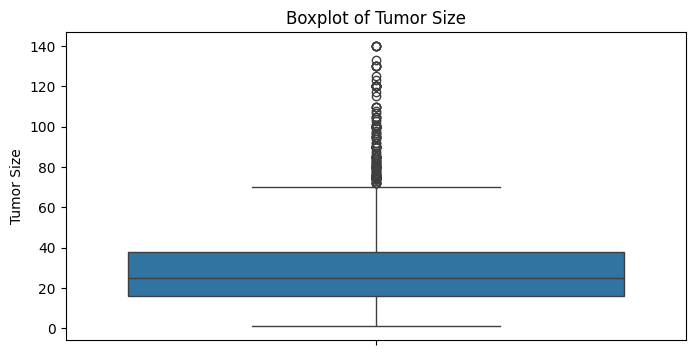

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Tumor Size'])
plt.title('Boxplot of Tumor Size')
plt.ylabel('Tumor Size')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, ukuran tumor mayoritas berada pada rentang sedang, tetapi terdapat sejumlah outlier dengan ukuran tumor yang sangat besar. Keberadaan outlier ini menandakan variasi kondisi pasien yang cukup tinggi.

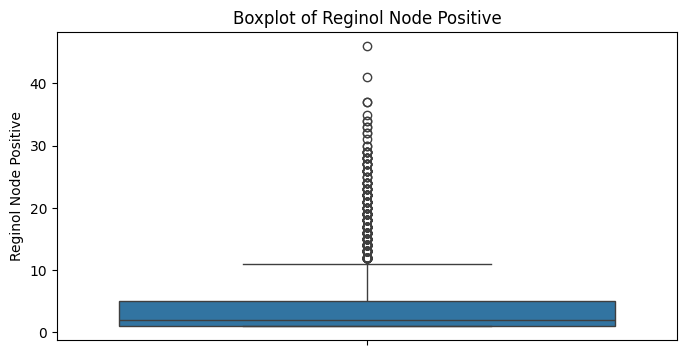

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Reginol Node Positive'])
plt.title('Boxplot of Reginol Node Positive')
plt.ylabel('Reginol Node Positive')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, terlihat bahwa sebagian besar pasien memiliki jumlah node positif yang relatif kecil, namun terdapat banyak nilai ekstrem yang jauh lebih tinggi dibandingkan mayoritas data. Hal ini menunjukkan distribusi data yang tidak normal dan condong ke kanan, serta mengindikasikan adanya kelompok kecil pasien dengan kondisi klinis yang jauh lebih berat.

# **Exploration Data (EDA)**

## **Comparison**

Aktivitas: Membandingkan rata-rata Survival Months pada setiap kategori T Stage (T1–T4) dan N Stage (N1–N3) untuk melihat perbedaan lama bertahan hidup pasien berdasarkan tingkat keparahan dan penyebaran kanker.

Tujuan: Mengetahui apakah semakin tinggi stadium tumor dan tingkat penyebaran ke kelenjar getah bening, maka rata-rata harapan hidup pasien cenderung menurun. Analisis ini membantu memahami pengaruh tingkat keparahan kanker terhadap kelangsungan hidup pasien.

Visualisasi: Bar Chart (Grafik Batang)

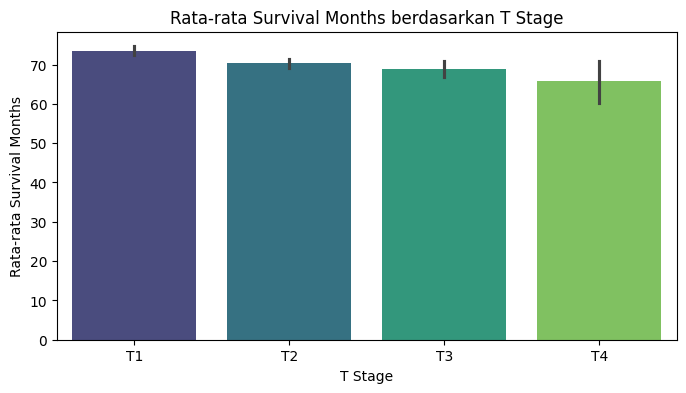

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df,
    x='T Stage',
    y='Survival Months',
    estimator='mean',
    hue='T Stage',
    palette='viridis',
    legend=False
)

plt.title('Rata-rata Survival Months berdasarkan T Stage')
plt.xlabel('T Stage')
plt.ylabel('Rata-rata Survival Months')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, semakin besar ukuran dan penyebaran tumor primer (semakin tinggi T Stage), maka harapan hidup pasien cenderung menurun.

Ini menunjukkan bahwa tingkat keparahan tumor sangat berpengaruh terhadap kelangsungan hidup pasien.

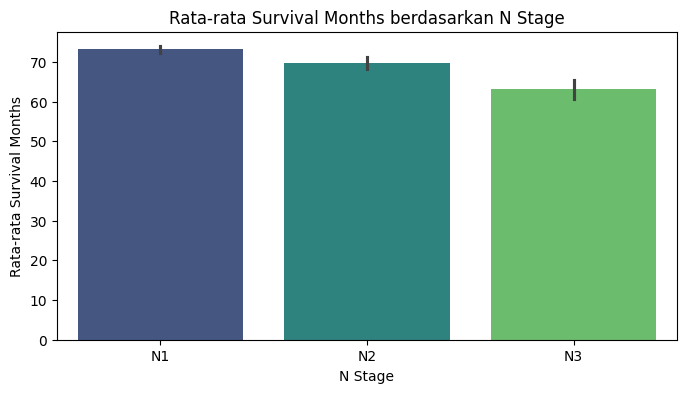

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df,
    x='N Stage',
    y='Survival Months',
    estimator='mean',
    hue='N Stage',
    palette='viridis',
    legend=False
)

plt.title('Rata-rata Survival Months berdasarkan N Stage')
plt.xlabel('N Stage')
plt.ylabel('Rata-rata Survival Months')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, semakin banyak kelenjar getah bening yang terlibat (N Stage meningkat), maka harapan hidup semakin menurun.

Ini memperkuat hipotesis bahwa penyebaran kanker ke kelenjar getah bening merupakan faktor penting yang memengaruhi prognosis pasien.

## **Composition**

Aktivitas: Menghitung jumlah dan persentase pasien pada setiap kategori 6th Stage untuk melihat distribusi stadium kanker dalam dataset.

Tujuan: Mengetahui stadium kanker yang paling dominan pada pasien dalam dataset serta memahami komposisi tingkat keparahan kanker secara keseluruhan.

Visualisasi: Pie Chart (Grafik Lingkaran)

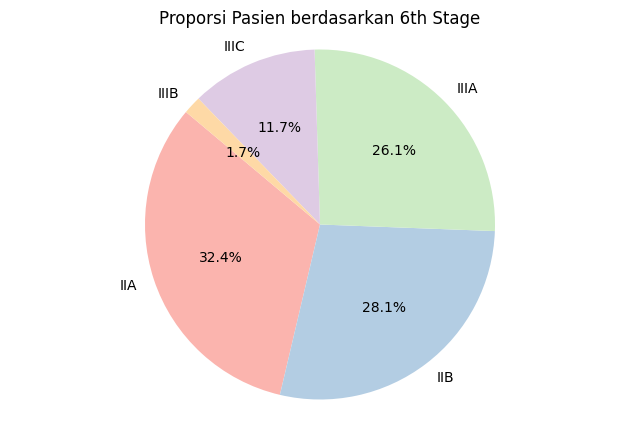

In [51]:
stage_counts = df['6th Stage'].value_counts()

plt.figure(figsize=(8, 5))
stage_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title('Proporsi Pasien berdasarkan 6th Stage')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, sebagian besar pasien penderita kanker payudara dalam dataset berada pada stadium menengah (Stage II).

Ini berarti data cukup representatif untuk menganalisis pengaruh stadium terhadap survival, namun jumlah pasien stadium sangat lanjut relatif lebih sedikit.

## **Distribution**

Aktivitas: Menganalisis penyebaran nilai Survival Months menggunakan histogram untuk melihat pola distribusi lama bertahan hidup pasien.

Tujuan: Mengetahui pola distribusi data, apakah cenderung normal, miring ke kanan/kiri (skewed), serta mendeteksi adanya nilai ekstrem (outlier) yang dapat memengaruhi hasil analisis.

Visualisasi: Histogram

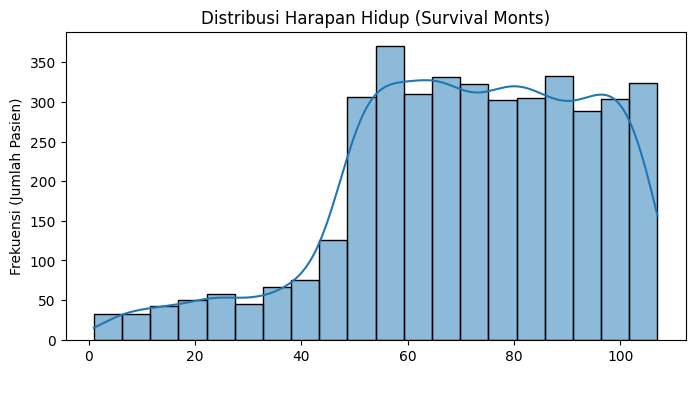

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Survival Months'], bins=20, kde=True)
plt.title('Distribusi Harapan Hidup (Survival Monts)')
plt.xlabel(' ')
plt.ylabel('Frekuensi (Jumlah Pasien)')
plt.show()

Berdasarkan visualisasi yang ditampilkan di atas, mayoritas pasien mampu bertahan cukup lama (sekitar 4–8 tahun).
Namun tetap terdapat pasien dengan survival rendah yang perlu dianalisis lebih lanjut berdasarkan stadium atau faktor risiko lainnya.

## **Relationship**

Aktivitas: Menganalisis hubungan antar ukuran tumor (Tumor Size), Reginol Node Positive, dan masa hidup pasien (Survival Months)

Tujuan: Untuk mengetahui apakah terdapat keterkaitan atau pengaruh antar Tumor Size, Reginol Node Positive, dan Survival Months yang dapat mengidentifikasi faktor mana yang paling dominan dalam memengaruhi kelangsungan hidup.

Visualisasi: Heatmap

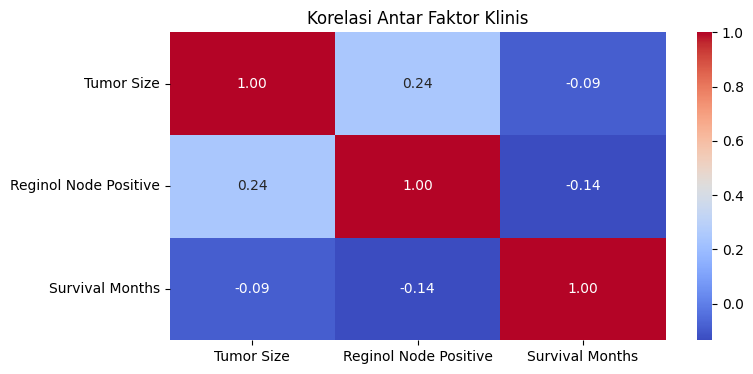

In [67]:
plt.figure(figsize=(8, 4))
sns.heatmap(data=df[['Tumor Size', 'Reginol Node Positive', 'Survival Months']].corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Korelasi Antar Faktor Klinis')
plt.show()

Berdasarkan visualisasi yang ditampilkan, dapat dilihat bahwa hubungan antar faktor klinis pada data kanker payudara cenderung lemah.
Heatmap korelasi menunjukkan bahwa:
* Ukuran tumor memiliki hubungan positif yang rendah dengan jumlah kelenjar getah bening yang positif.
* Ukuran tumor dan lama bertahan hidup bersifat negatif sangat lemah, sehingga ukuran tumor saja hampir tidak dapat menjelaskan perbedaan survival pasien.
* Jumlah reginol node positif dengan survival months korelasinya negatif tetapi tetap rendah, menandakan bahwa peningkatan jumlah node positif hanya sedikit berkaitan dengan penurunan lama bertahan hidup.

# **Menyimpan Data**

In [66]:
save_path = "/content/drive/MyDrive/Dataset Praktikum AVD Octaa/Breast_Cancer_Copy.xlsx"

df.to_excel(save_path, index=False)

print(f"Berhasil Disimpan di {save_path}")

Berhasil Disimpan di /content/drive/MyDrive/Dataset Praktikum AVD Octaa/Breast_Cancer_Copy.xlsx
